# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

np.random.seed(42)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# # Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

city_name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_spd = []
country = []
date = []
counter = 1

test = [cities[0], cities[1], cities[2],cities[3],cities[4]]

print("""
Beginning Data Retrieval     
-----------------------------
""")
for city in cities:
    try:
        response = requests.get(base_url+city+"&appid="+weather_api_key+"&units=imperial").json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f"Processing Record {counter} of {len(cities)} | {city}")
        counter = counter + 1
  
    except KeyError:
        print(f"{city} not found. Skipping...")
        pass 

print("""
-----------------------------
Data Retrieval Complete      
-----------------------------
""")
# #Testing
# response = requests.get(base_url+cities[2]+"&appid="+weather_api_key+"&units=imperial").json()  
# lat.append(response['coord']['lat'])
# temp_f.append(response['main']['temp'])
# humidity = response["main"]["humidity"]
# clouds = response["clouds"]["all"]
# wind_spd = response["wind"]["speed"]




Beginning Data Retrieval     
-----------------------------

Processing Record 1 of 597 | henties bay
illoqqortoormiut not found. Skipping...
Processing Record 2 of 597 | bethel
Processing Record 3 of 597 | saint-francois
Processing Record 4 of 597 | ushuaia
Processing Record 5 of 597 | mar del plata
Processing Record 6 of 597 | kruisfontein
Processing Record 7 of 597 | bronnoysund
tawkar not found. Skipping...
Processing Record 8 of 597 | yumen
Processing Record 9 of 597 | albany
Processing Record 10 of 597 | dikson
Processing Record 11 of 597 | ossora
Processing Record 12 of 597 | vaini
Processing Record 13 of 597 | castro
taolanaro not found. Skipping...
Processing Record 14 of 597 | vanimo
Processing Record 15 of 597 | san cristobal
Processing Record 16 of 597 | ulladulla
Processing Record 17 of 597 | ewa beach
Processing Record 18 of 597 | bluff
Processing Record 19 of 597 | maldonado
Processing Record 20 of 597 | mataura
Processing Record 21 of 597 | jamestown
Processing Record 

Processing Record 191 of 597 | kokopo
Processing Record 192 of 597 | carutapera
Processing Record 193 of 597 | georgetown
Processing Record 194 of 597 | cidreira
Processing Record 195 of 597 | pemba
Processing Record 196 of 597 | poum
Processing Record 197 of 597 | paraiso
Processing Record 198 of 597 | mount isa
Processing Record 199 of 597 | abu dhabi
Processing Record 200 of 597 | valle del guamuez
Processing Record 201 of 597 | mirnyy
Processing Record 202 of 597 | houma
thilogne not found. Skipping...
Processing Record 203 of 597 | kattivakkam
palabuhanratu not found. Skipping...
Processing Record 204 of 597 | sharjah
Processing Record 205 of 597 | moundou
Processing Record 206 of 597 | komsomolskiy
Processing Record 207 of 597 | huilong
Processing Record 208 of 597 | saldanha
Processing Record 209 of 597 | suoyarvi
Processing Record 210 of 597 | chapais
Processing Record 211 of 597 | plettenberg bay
Processing Record 212 of 597 | tottori
Processing Record 213 of 597 | abu samrah


Processing Record 379 of 597 | khipro
Processing Record 380 of 597 | maragogi
Processing Record 381 of 597 | nantucket
Processing Record 382 of 597 | yibin
Processing Record 383 of 597 | kaseda
Processing Record 384 of 597 | sept-iles
Processing Record 385 of 597 | hay river
Processing Record 386 of 597 | grindavik
Processing Record 387 of 597 | shimoda
Processing Record 388 of 597 | rincon
Processing Record 389 of 597 | qaqortoq
Processing Record 390 of 597 | veraval
satitoa not found. Skipping...
Processing Record 391 of 597 | beterou
Processing Record 392 of 597 | lata
Processing Record 393 of 597 | talnakh
Processing Record 394 of 597 | chincha alta
Processing Record 395 of 597 | portland
Processing Record 396 of 597 | suntar
Processing Record 397 of 597 | toro
fianga not found. Skipping...
Processing Record 398 of 597 | lakhimpur
Processing Record 399 of 597 | khani
Processing Record 400 of 597 | george town
Processing Record 401 of 597 | kabwe
Processing Record 402 of 597 | goder

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
#ensure all lists are the same length

print(len(city_name))
print(len(lat))
print(len(lng))
print(len(temp_max))
print(len(humidity))
print(len(clouds))
print(len(wind_spd))
print(len(country))
print(len(date))


544
544
544
544
544
544
544
544
544


In [45]:
city_data = pd.DataFrame({
    'City':city_name,
    'Latitude': lat,
    'Longitude':lng,
    'Max_Temp': temp_f,
    'Humidity': humidity,
    'Cloudiness':clouds,
    'Wind_Speed':wind_spd,
    'Country': country,
    'Date': date
})
city_data.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Henties Bay,-22.12,14.28,55.99,86,0,8.39,NA,1593378023
1,Bethel,41.37,-73.41,78.01,78,75,0.63,US,1593377996
2,Saint-François,46.42,3.91,59.00,82,90,2.24,FR,1593378045
3,Ushuaia,-54.80,-68.30,37.40,74,75,12.75,AR,1593378001
4,Mar del Plata,-38.00,-57.56,48.20,70,40,3.36,AR,1593378046


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
#check for cities with humidity >100%
humidity_check = city_data.loc[city_data.Humidity>100,:]
humidity_check

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


#*****from previous steps - no cities with humidity greater than 100%**********

In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data
clean_city_data.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Henties Bay,-22.12,14.28,55.99,86,0,8.39,NA,1593378023
1,Bethel,41.37,-73.41,78.01,78,75,0.63,US,1593377996
2,Saint-François,46.42,3.91,59.00,82,90,2.24,FR,1593378045
3,Ushuaia,-54.80,-68.30,37.40,74,75,12.75,AR,1593378001
4,Mar del Plata,-38.00,-57.56,48.20,70,40,3.36,AR,1593378046


In [54]:
# Extract relevant fields from the data frame
clean_city_data= clean_city_data[["City","Cloudiness","Country", "Date","Humidity", "Latitude","Longitude","Max_Temp", "Wind_Speed"]]
clean_city_data.index.name = 'City_ID'
# Export the City_Data into a csv

clean_city_data.to_csv(output_data_file,index = True, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature (6/28/20)')

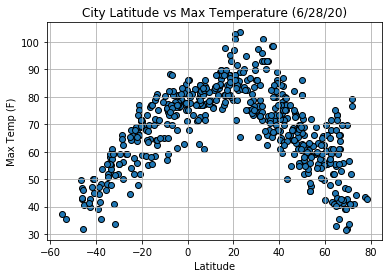

In [66]:
x_lat = clean_city_data["Latitude"]
y_lat_temp = clean_city_data["Max_Temp"]
plt.scatter(x_lat,y_lat_temp,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs Max Temperature (6/28/20)")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity (6/28/20)')

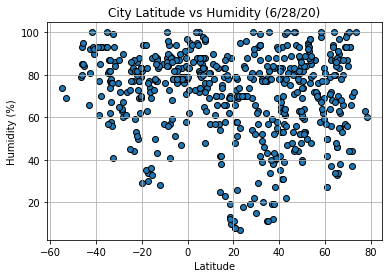

In [67]:
y_lat_hum = clean_city_data["Humidity"]
plt.scatter(x_lat,y_lat_hum,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (6/28/20)")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness (6/28/20)')

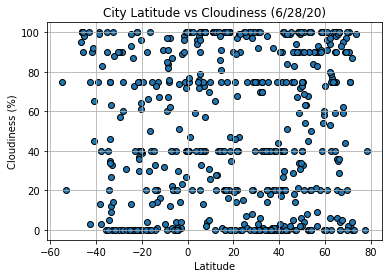

In [69]:
y_lat_cloud = clean_city_data["Cloudiness"]
plt.scatter(x_lat,y_lat_cloud,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (6/28/20)")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed (6/28/20)')

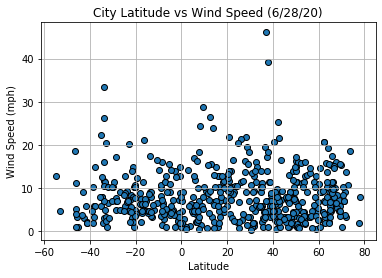

In [70]:
y_lat_wind = clean_city_data["Wind_Speed"]
plt.scatter(x_lat,y_lat_wind,edgecolors = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (6/28/20)")

## Linear Regression

In [102]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregress_func(x,y):
    
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y) 
   
    #set equation needed to get regression values using y = mx +b
    regress_values = x*slope + intercept

    #get equation of a line for printing on graph
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plot scatter chart
    plt.scatter(x,y)
    #plot regression values on the same chart
    plt.plot(x,regress_values, "-r")
    #add equation of line describing data set
    plt.annotate(line_eq, (20,35), fontsize = 15, color = 'red')
    

In [99]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = clean_city_data.loc[clean_city_data.Latitude >0,:]
southern_hem = clean_city_data.loc[clean_city_data.Latitude <0,:]
southern_hem

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,Henties Bay,0,NA,1593378023,86,-22.12,14.28,55.99,8.39
3,Ushuaia,75,AR,1593378001,74,-54.80,-68.30,37.40,12.75
4,Mar del Plata,40,AR,1593378046,70,-38.00,-57.56,48.20,3.36
5,Kruisfontein,46,ZA,1593378046,77,-34.00,24.73,52.05,11.61
11,Vaini,75,TO,1593378048,88,-21.20,-175.20,77.00,8.05
...,...,...,...,...,...,...,...,...,...
534,Imbituba,75,BR,1593378181,67,-28.24,-48.67,62.60,6.93
537,Sola,73,VU,1593378181,85,-13.88,167.55,80.01,17.54
539,Vredendal,0,ZA,1593378182,84,-31.67,18.50,51.40,3.11


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(20, 35, 'y = -0.52x + 90.74')

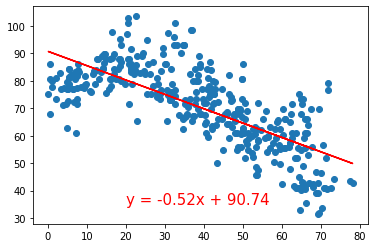

In [81]:
x_val_nh_lat = northern_hem["Latitude"]
y_val_NH_temp = northern_hem["Max_Temp"]
slope, intercept, rvalue, pvalue, stderr= linregress(x_val_nh_lat,y_val_NH_temp)

#set equation needed to get regression values using y = mx +b
regress_values = x_val_nh_lat*slope + intercept

#get equation of a line for printing on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter chart
plt.scatter(x_val_nh_lat,y_val_NH_temp)
#plot regression values on the same chart
plt.plot(x_val_nh_lat,regress_values, "-r")
#add equation of line describing data set
plt.annotate(line_eq, (20,35), fontsize = 15, color = 'red')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Test
second
last


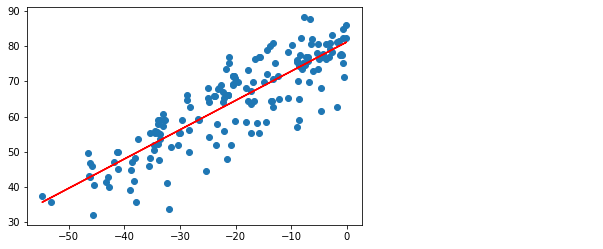

In [104]:

x_sh_lat = southern_hem['Latitude']
y_sh_temp = southern_hem['Max_Temp']
linregress_func(x_sh_lat,y_sh_temp)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression